In [206]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from math import pi,sin,cos

## Generate Double Spiral data

### Function to generate a spiral

In [207]:
def make_spiral(rand, Eta, Phi):
    def f(theta,eta=.1, rnd=.1, phi=0):
        R=1+(1+eta)*theta/(2*pi)+rnd*np.random.normal(0,rnd)
        x=R*cos(theta+phi)
        y=R*sin(theta+phi)
        return(x,y)
    rvals=np.linspace(0,4*pi,2500)
    xvals,yvals=zip(*[f(r,rnd=rand, eta=Eta,phi=Phi) for r in rvals])
    return(xvals,yvals)

### generate concentric spirals

In [208]:
x,y=make_spiral(.35,2.1,0)
u,v=make_spiral(.35,2.1,pi)

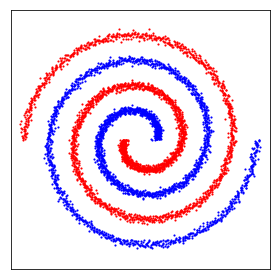

In [209]:
plt.scatter(x,y,marker=".",s=5,c="blue")
plt.scatter(u, v, marker=".", s=5, c="red")
#plt.scatter(x+u, y+v, marker=".",s=15,c="k")
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
fig.savefig("kmeans-input-double-spiral.pdf")

## Fit concentric spirals using KMeans - 2 Clusters

In [210]:
from sklearn.cluster import KMeans

In [211]:
X=np.array([x+u,y+v]).T
XSPIRAL=X

In [212]:
kmeans_Spiral=KMeans(n_clusters=2)
kmeans_Spiral.fit(XSPIRAL)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [213]:
kmeans_Spiral.labels_,len(kmeans_Spiral.labels_),len(XSPIRAL)

(array([1, 1, 1, ..., 0, 0, 0], dtype=int32), 5000, 5000)

In [214]:
def get_cluster_xy(X,cluster,labels):
    stuff=X[labels==cluster]
    #stuff=[list(xy) for xy,i in zip(X,labels) if i==cluster ]
    return zip(*stuff)

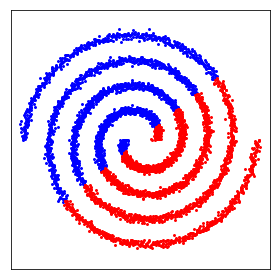

In [215]:
p,q=get_cluster_xy(XSPIRAL,0,kmeans_Spiral.labels_)
r,s=get_cluster_xy(XSPIRAL,1,kmeans_Spiral.labels_)
plt.scatter(p,q,marker=".",s=15,c="blue")
plt.scatter(r,s, marker=".",s=15,c="red")
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
fig.savefig("cluster-kmeans-spiral-2.pdf")

## Fit concentric spirals using k-means with 4 clusters

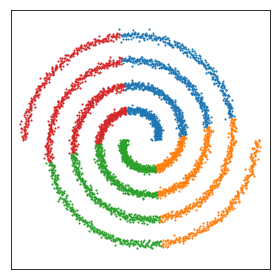

In [216]:
kmeans_Spiral4=KMeans(n_clusters=4)
kmeans_Spiral4.fit(XSPIRAL)
for j in range(4):
    p,q=get_cluster_xy(XSPIRAL,j,kmeans_Spiral4.labels_)
    plt.scatter(p,q,marker=".",s=5)
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-spiral-4.pdf")

In [217]:
from sklearn.metrics import silhouette_score
maxclusters=10
sils_spiral=[]
for j in range(2,maxclusters+1):
    kmeans=KMeans(n_clusters=j)
    kmeans.fit(X)
    sil=silhouette_score(X,kmeans.labels_)
    sils_spiral.append(sil)
    print(j,sil)

2 0.3309522614451529
3 0.352527147108086
4 0.35546408971714133
5 0.3295306227040393
6 0.3501115227471742
7 0.34823096519434027
8 0.3500430580429642
9 0.35115010651115647
10 0.36410811865353054


## Generate multiple gaussian clouds

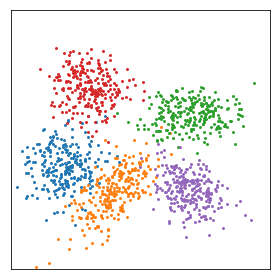

In [218]:
nclouds=5
A=[[[.5,0],[0,.5]], 
   [[.75,.5],[.5,.75]], 
   [[1,0],[0,.25]], 
   [[.5,0],[0,.5]], 
   [[.5,-.2],[-.2,.5]]]

centers=np.array([[2,4],[4,3],[7,6],[3,7],[7,3]])
xcenters=centers.T[0]
ycenters=centers.T[1]
xx=[]; yy=[]
for j in range(nclouds):
    center=[xcenters[j],ycenters[j]]
    xy=np.random.multivariate_normal(center,A[j],250)
    x,y=zip(*xy)
    plt.scatter(x,y,marker=".", s=15)
    xx=xx+list(x); yy=yy+list(y)
X=np.array([xx,yy]).T
XCLOUD=X
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
fig.savefig("Gaussian-clouds.pdf")

## Fit Clouds using K-Means


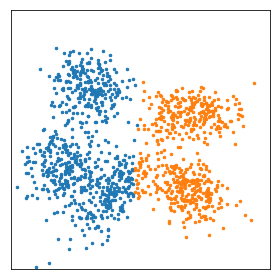

In [219]:
kmeans2=KMeans(n_clusters=2)
kmeans2.fit(X)
for j in range(2):
    p,q=get_cluster_xy(X,j,kmeans2.labels_)
    plt.scatter(p,q,marker=".",s=25)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-clouds-2.pdf")

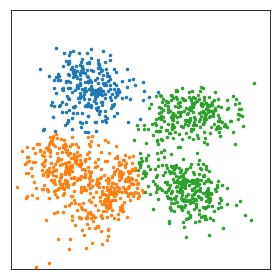

In [220]:
kmeans3=KMeans(n_clusters=3)
kmeans3.fit(X)
for j in range(3):
    p,q=get_cluster_xy(X,j,kmeans3.labels_)
    plt.scatter(p,q,marker=".",s=25)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-clouds-3.pdf")

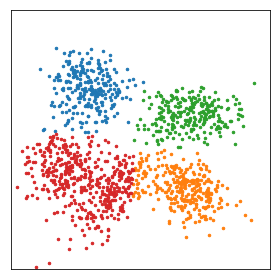

In [221]:
kmeans4=KMeans(n_clusters=4)
kmeans4.fit(X)
for j in range(4):
    p,q=get_cluster_xy(X,j,kmeans4.labels_)
    plt.scatter(p,q,marker=".",s=25)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-clouds-4.pdf")

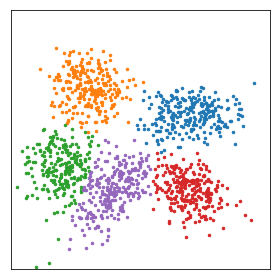

In [222]:
kmeans5=KMeans(n_clusters=5)
kmeans5.fit(X)
for j in range(5):
    p,q=get_cluster_xy(X,j,kmeans5.labels_)
    plt.scatter(p,q,marker=".",s=25)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-clouds-5.pdf")

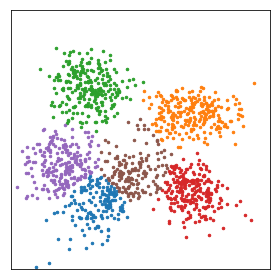

In [223]:
kmeans6=KMeans(n_clusters=6)
kmeans6.fit(X)
for j in range(6):
    p,q=get_cluster_xy(X,j,kmeans6.labels_)
    plt.scatter(p,q,marker=".",s=25)
plt.xlim([0,10])
plt.ylim([0,10])
plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-clouds-6.pdf")

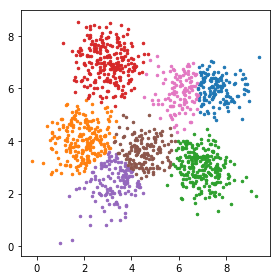

In [224]:
kmeans7=KMeans(n_clusters=7)
kmeans7.fit(X)
for j in range(7):
    p,q=get_cluster_xy(X,j,kmeans7.labels_)
    plt.scatter(p,q,marker=".",s=25)
#plt.xlim([0,10])
#plt.ylim([0,10])
#plt.xticks([]); plt.yticks([])
fig=plt.gcf()
fig.set_size_inches(4,4)
fig.tight_layout()
#fig.savefig("cluster-kmeans-clouds-7.pdf")

## Silhouette

In [225]:
from sklearn.metrics import silhouette_score

In [226]:
maxclusters=10
sils=[]
for j in range(2,maxclusters+1):
    kmeans=KMeans(n_clusters=j)
    kmeans.fit(X)
    sil=silhouette_score(X,kmeans.labels_)
    sils.append(sil)
    print(j,sil)

2 0.4411850919110908
3 0.4855862527659638
4 0.5087197648447515
5 0.5105143949220745
6 0.4928673885676838
7 0.4655674976533597
8 0.4201989676051158
9 0.38076977965144027
10 0.3583977796405944


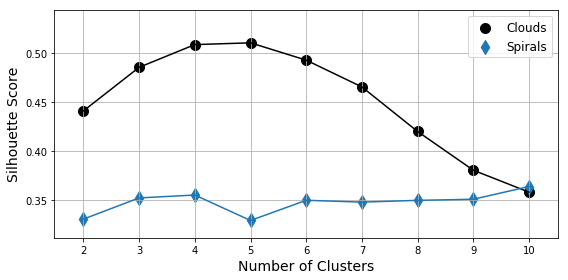

In [227]:
plt.scatter(range(2,maxclusters+1),sils,c="k",label="Clouds",s=100)
plt.scatter(range(2,maxclusters+1),sils_spiral, marker="d",s=100,label="Spirals")
plt.plot(range(2,maxclusters+1),sils,c="k")
plt.plot(range(2,maxclusters+1),sils_spiral)
plt.xlabel("Number of Clusters",fontsize=14)
plt.ylabel("Silhouette Score", fontsize=14)
plt.legend(fontsize=12)
plt.xticks(range(2,11))
plt.grid()
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("Silhouette-Score-Gaussian-KMeans.pdf")

In [228]:
from sklearn.metrics import calinski_harabaz_score as CH

In [229]:
maxclusters=10
CHS=[]
for j in range(2,maxclusters+1):
    kmeans=KMeans(n_clusters=j)
    kmeans.fit(XCLOUD)
    chscore=CH(XCLOUD,kmeans.labels_)
    CHS.append(chscore)
    print(j,chscore)
CHS_spiral=[]
for j in range(2,maxclusters+1):
    kmeans=KMeans(n_clusters=j)
    kmeans.fit(XSPIRAL)
    chscore=CH(XSPIRAL,kmeans.labels_)
    CHS_spiral.append(chscore)
    print(j,chscore)

2 1167.6676290278851
3 1442.3637018768943
4 1751.3492976471437
5 1953.3568936291344
6 1894.4750261213646
7 1855.3835702396996
8 1774.4767743070822
9 1721.9594220768154
10 1706.0827935305301
2 2905.645887384484
3 3420.255392354018
4 3774.097690037348
5 3634.877159139621
6 3662.035028605066
7 3787.998192961122
8 3790.366369919451
9 3807.337347675029
10 3919.7449463627336


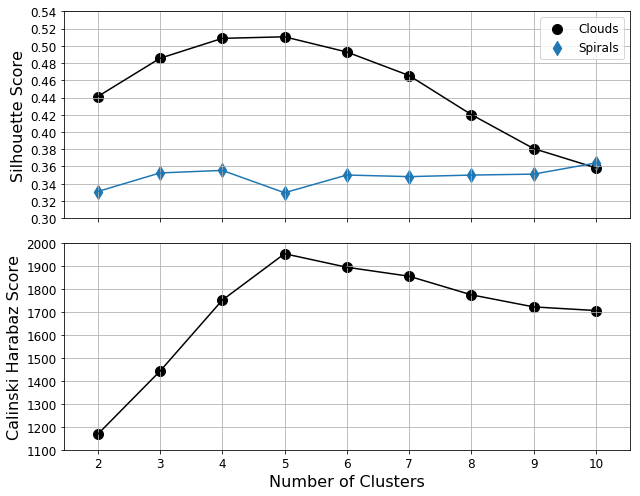

In [230]:
fig,ax=plt.subplots(nrows=2,ncols=1,sharex=True)

for a in ax:
    a.tick_params(axis = 'both', which = 'major', labelsize = 12)
    a.tick_params(axis = 'both', which = 'minor', labelsize = 12)


ax[0].scatter(range(2,maxclusters+1),sils,c="k",label="Clouds",s=100)
ax[0].scatter(range(2,maxclusters+1),sils_spiral, marker="d",s=100,label="Spirals")
ax[0].plot(range(2,maxclusters+1),sils,c="k")
ax[0].plot(range(2,maxclusters+1),sils_spiral)
#plt.xlabel("Number of Clusters",fontsize=14)
ax[0].set_ylabel("Silhouette Score", fontsize=16)
ax[0].legend(fontsize=12)
ax[0].set_xticks(range(2,11))
ax[0].grid()
ax[0].set_ylim([.3,.54])
ax[0].set_yticks(np.arange(.3,.54,.02))

#fig=plt.gcf()
#fig.set_size_inches(8,4)
#fig.tight_layout()
#

ax[1].scatter(range(2,maxclusters+1),CHS,c="k",label="Clouds",s=100)
ax[1].scatter(range(2,maxclusters+1),CHS_spiral, marker="d",s=100,label="Spirals")
ax[1].plot(range(2,maxclusters+1),CHS,c="k")
ax[1].plot(range(2,maxclusters+1),CHS_spiral)
ax[1].set_xlabel("Number of Clusters",fontsize=16)
ax[1].set_ylabel("Calinski Harabaz Score", fontsize=16)
#ax[1].legend(fontsize=12)
ax[1].set_xticks(range(2,11))
ax[1].grid()
ax[1].set_ylim([1100,2000])
ax[1].set_yticks(np.arange(1100,2001,100))
#fig=plt.gcf()
fig.set_size_inches(9,7)
fig.tight_layout()
fig.savefig("CH-and-Silhouetted-Score-Clouds-and-Spirals-KMeans.pdf")

## Visualization

In [231]:
def visualize_PC(ax,clf,X,Y,DX,DY,thelevels,colors,markers,xlab="X",
                                ylab="Y", axtitle="Classification Boundary", 
                x_min=0, x_max=10, y_min=0, y_max=10, title_size=14,ms=20):
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #x_min, x_max = , 10
    #y_min, y_max = 0, 10
    xx, yy = np.meshgrid(np.arange(x_min, x_max, DX),
                     np.arange(y_min, y_max, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=ax.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=1.5,colors="k")
    #c=ax.contourf(xx, yy, Z, alpha=.1)
        
    nclasses=len(colors)
    for i in range(nclasses):
        xyvals=X[Y==i]
        #xyvals=[(x,y) for (x,y,theclass) in zip(X[:,0],X[:,1],Y) if theclass==i]
        if len(xyvals)>0:
            x,y=zip(*xyvals)
            ax.scatter(x,y,marker=markers[i],color=colors[i],s=ms)


    #ax.set_xlabel(xlab,fontsize=14)
    #ax.set_ylabel(ylab,fontsize=14)
    ax.set_title(axtitle,fontsize=title_size)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    ax.set_xticks([]); ax.set_yticks([])
    #ax.set_ylim(0,1)
    #ax.set_xlim(0,1)
    ax.grid()
    return(ax)

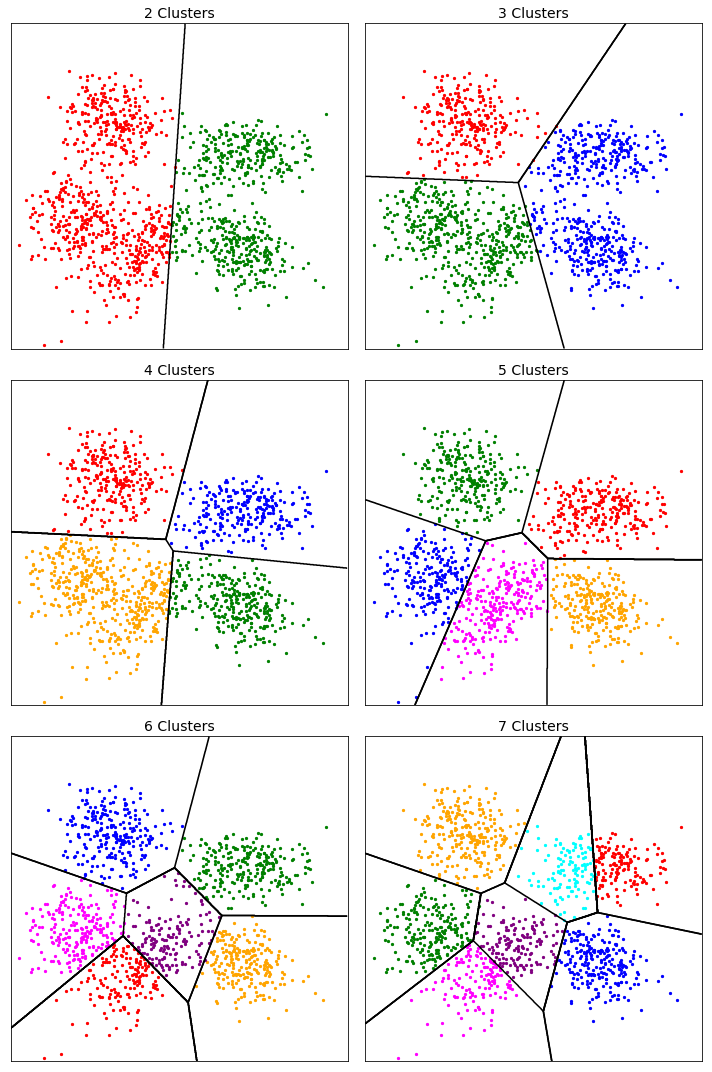

In [232]:
colors=["red", "green","blue","orange","magenta","purple","cyan"]
markers=7*["."]
fig,ax=plt.subplots(nrows=3, ncols=2,sharex=True,sharey=True)
fig.set_size_inches(10,15)
visualize_PC(ax[2,1],kmeans7, X,kmeans7.labels_, .01, .01,[0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="7 Clusters")
visualize_PC(ax[2,0],kmeans6, X,kmeans6.labels_, .01, .01,
             [0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="6 Clusters")
visualize_PC(ax[1,1],kmeans5, X,kmeans5.labels_, .01, .01,
             [0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="5 Clusters")
visualize_PC(ax[1,0],kmeans4, X,kmeans4.labels_, .01, .01,
             [0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="4 Clusters")
visualize_PC(ax[0,1],kmeans3, X,kmeans3.labels_, .01, .01,
             [0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="3 Clusters")
visualize_PC(ax[0,0],kmeans2, X,kmeans2.labels_, .01, .01,
             [0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="2 Clusters")
fig.tight_layout()
#fig.savefig("kmeans-gaussian-cluster-boundaries.pdf")

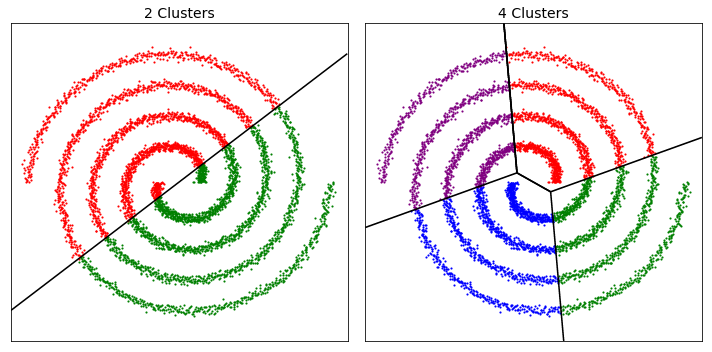

In [233]:
colors=["red", "green","blue","purple"]
markers=4*["."]
fig,ax=plt.subplots(nrows=1, ncols=2,sharex=True,sharey=True)
fig.set_size_inches(10,5)
visualize_PC(ax[0],kmeans_Spiral, XSPIRAL, kmeans_Spiral.labels_, .01, .01,[0.5,1.5,2.5,3.5],colors,markers,
             axtitle="2 Clusters", x_min=-8, x_max=8, y_min=-8, y_max=8,ms=5)
visualize_PC(ax[1],kmeans_Spiral4, XSPIRAL,kmeans_Spiral4.labels_, .01, .01,
             [0.5,1.5,2.5,3.5,4.5,5.5],colors,markers,
             axtitle="4 Clusters", x_min=-8, x_max=8, y_min=-8, y_max=8,ms=5)
fig.tight_layout()
fig.savefig("kmeans-spiral-cluster-boundaries.pdf")

## Hierarchical Clustering

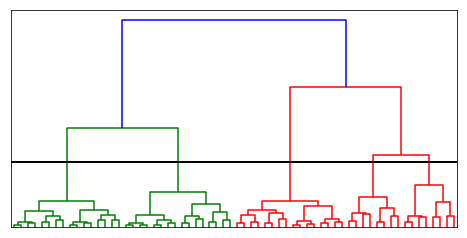

In [234]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z=linkage(XCLOUD, method="ward")
dendrogram(Z,5,truncate_mode="level",show_leaf_counts=True)
fig=plt.gcf()
fig.set_size_inches(8,4)
plt.grid(axis="y")
plt.xticks([])
plt.yticks([])
xmin,xmax=plt.xlim()
plt.plot([xmin,xmax],[30,30],c="k",lw=2)
plt.show()
fig.tight_layout()
fig.savefig("dendrogram-agglom-clustering.pdf")

In [235]:
from sklearn.cluster import AgglomerativeClustering

In [236]:
clustering = AgglomerativeClustering( n_clusters=5).fit_predict(XCLOUD)
from scipy.spatial import ConvexHull

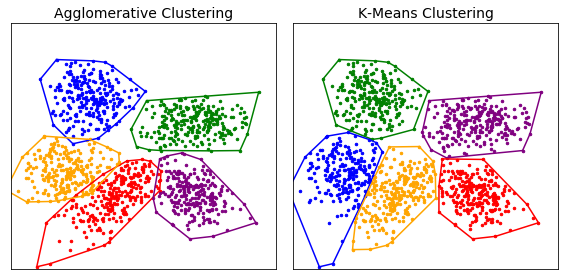

In [237]:
colors=["red", "green","blue","purple","orange"]
fig,ax=plt.subplots(nrows=1,ncols=2)
for j in range(5):
    col=colors[j]
    xy=XCLOUD[clustering==j]
    x,y=zip(*xy)
    ax[0].scatter(x,y,marker=".",s=25,c=col)
    hull=ConvexHull(xy)
    for simplex in hull.simplices:
        ax[0].plot(xy[simplex,0], xy[simplex,1],c=col)
ax[0].set_title("Agglomerative Clustering",fontsize=14)
ax[1].set_title("K-Means Clustering",fontsize=14)

colors=["purple", "green","blue","red","orange"]

for j in range(5):
    col=colors[j]
    xy=XCLOUD[kmeans5.labels_==j]
    x,y=zip(*xy)
    ax[1].scatter(x,y,marker=".",s=25,c=col)
    hull=ConvexHull(xy)
    for simplex in hull.simplices:
        ax[1].plot(xy[simplex,0],xy[simplex,1],c=col)
for j in range(2):
    ax[j].set_xlim([0,10])
    ax[j].set_ylim([0,10])
    ax[j].set_xticks([]); ax[j].set_yticks([])
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("agglom-vs-K-Means-cluster-gaussian.pdf")

In [240]:
from sklearn.metrics.cluster import fowlkes_mallows_score as FM
FM(kmeans5.labels_,clustering)

0.9104708183976866

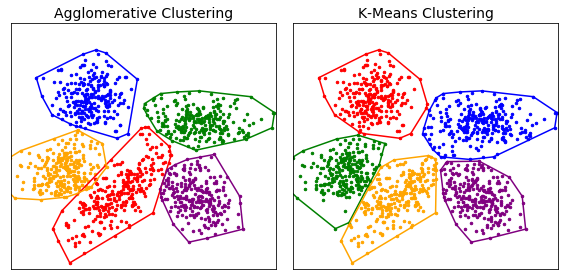

In [30]:
colors=["red", "green","blue","purple","orange"]
fig,ax=plt.subplots(nrows=1,ncols=2)
for j in range(5):
    col=colors[j]
    xy=XCLOUD[clustering==j]
    x,y=zip(*xy)
    ax[0].scatter(x,y,marker=".",s=25,c=col)
    hull=ConvexHull(xy)
    for simplex in hull.simplices:
        ax[0].plot(xy[simplex,0], xy[simplex,1],c=col)
ax[0].set_title("Agglomerative Clustering",fontsize=14)
ax[1].set_title("K-Means Clustering",fontsize=14)

colors=["purple", "green","blue","red","orange"]

for j in range(5):
    col=colors[j]
    xy=XCLOUD[kmeans5.labels_==j]
    x,y=zip(*xy)
    ax[1].scatter(x,y,marker=".",s=25,c=col)
    hull=ConvexHull(xy)
    for simplex in hull.simplices:
        ax[1].plot(xy[simplex,0],xy[simplex,1],c=col)
for j in range(2):
    ax[j].set_xlim([0,10])
    ax[j].set_ylim([0,10])
    ax[j].set_xticks([]); ax[j].set_yticks([])
fig.set_size_inches(8,4)
fig.tight_layout()
#fig.savefig("agglom-vs-K-Means-cluster-gaussian.pdf")

## DBSCAN

In [64]:
from sklearn.cluster import DBSCAN

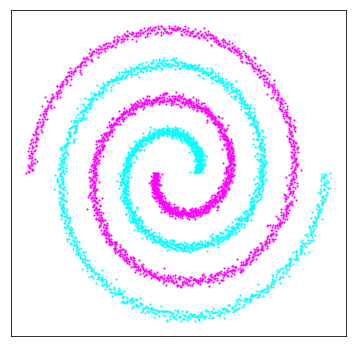

In [200]:
clustering = DBSCAN(eps=.5, min_samples=5).fit(XSPIRAL)
colors=["cyan", "magenta","blue","purple","orange"]
#fig,ax=plt.subplots(nrows=1,ncols=2)
clusteringlabels=list(set(clustering.labels_))
k=0
for j in clusteringlabels:
    col=colors[k]
    xy=XSPIRAL[clustering.labels_==j]
    #print(len(xy))
    if (len(xy)>0):
        x,y=zip(*xy)
        plt.scatter(x,y,marker=".",s=5,c=col)
        #if len(xy)>3:
        #    hull=ConvexHull(xy)
        #    for simplex in hull.simplices:
        #|        plt.plot(xy[simplex,0], xy[simplex,1],c=col)
    k+=1
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.xticks([]); plt.yticks([])
#ax[0].set_title("Agglomerative Clustering",fontsize=14)
#ax[1].set_title("K-Means Clustering",fontsize=14)
fig.savefig("dbscan-results-spiral.pdf")
